## Handling Missing Values in Categorical Data
In real-world datasets, categorical features often contain missing values due to incomplete data collection, user omission, or system errors. Unlike numerical features, categorical variables cannot be imputed using statistical measures such as mean or median. Therefore, specialized strategies are required.

One effective and widely used technique is Missing Category (Label) Imputation, where missing values are replaced with a new category such as "Missing", "Unknown", or "Not Available".
This approach treats missingness as meaningful information rather than discarding records or introducing statistical bias.


----------------------------------------------------------------------------------------------------------------------------------------

In [1]:
import pandas as pd 
import numpy as np
import sklearn as sns 
import matplotlib.pyplot as plt 
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer

In [2]:
df=pd.read_csv('train.csv',usecols=['GarageQual','FireplaceQu','SalePrice'])

In [3]:
df.head()

,FireplaceQu,GarageQual,SalePrice
0,NaN,TA,208500
1,TA,TA,181500
2,TA,TA,223500
3,Gd,TA,140000
4,TA,TA,250000


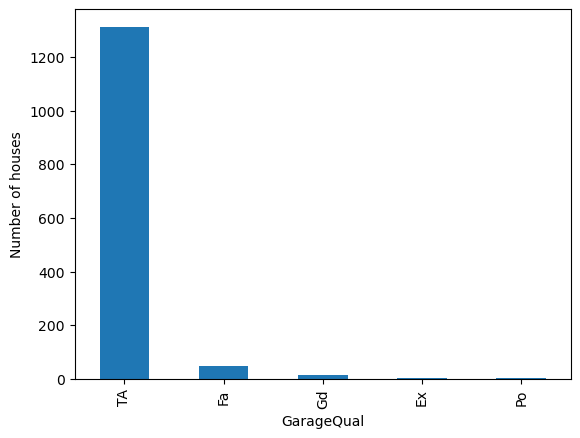

In [12]:
df['GarageQual'].value_counts().sort_values(ascending=False).plot(kind='bar')
plt.xlabel('GarageQual')
plt.ylabel('Number of houses')
plt.show()

In [6]:
df['GarageQual'].isnull().mean()*100

47.26027397260274

In [14]:
df['GarageQual'].fillna('missing',inplace=True)

C:\Users\JOHN\AppData\Local\Temp\ipykernel_10400\1495229693.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['GarageQual'].fillna('missing',inplace=True)


Text(0, 0.5, 'Number of House')

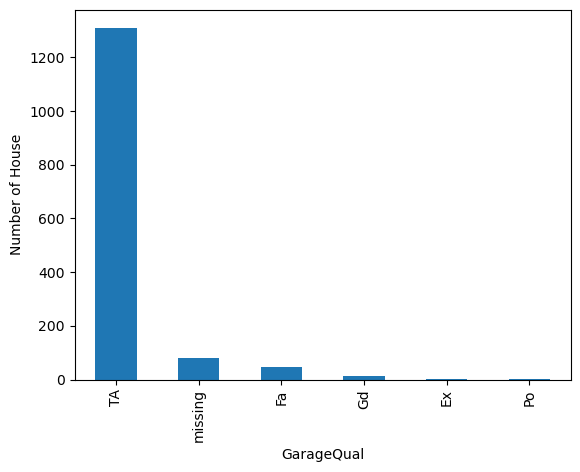

In [16]:
df['GarageQual'].value_counts().plot(kind='bar')
plt.xlabel('GarageQual')
plt.ylabel('Number of House')

## using Sklearn

In [17]:
X_train,X_test,y_train,y_test = train_test_split(df.drop(columns=['SalePrice']),df['SalePrice'],test_size=0.2)

In [18]:
imputer=SimpleImputer(strategy='constant',fill_value='missing')

In [19]:
X_train=imputer.fit_transform(X_train)
X_test=imputer.transform(X_test)

In [20]:
imputer.statistics_

array(['missing', 'missing'], dtype=object)